In [4]:
inpD = 'Lymphoma' 

In [13]:
import os
cwd = os.getcwd()
os.listdir(cwd+"/"+inpD)

['lfq-oncodb',
 'LarsSelFtrDF.csv',
 'LarsFtrSelVal.txt',
 'LarsFtrSelVal.csv',
 'LarsFtrSel.txt',
 'J3KRR8.png',
 'HenrikList.txt',
 'HenrikFtrSelValTrp.txt',
 'HenrikFtrSelValTrp.csv',
 'HenrikFtrSelVal.txt',
 'HenrikFtrSelVal.csv',
 'HenrikFtrSel.txt',
 'HeatMap.pdf',
 'GroupsMatch.txt',
 'GroupsLFQ.txt',
 'Groups.txt',
 'GroupHenrikList_version2Val.csv',
 'GroupHenrikList_version2Val .txt',
 'GroupHenrikList_version2 .txt',
 'GroupHenrikList.txt',
 'FtrSelOld.txt',
 'FtrSel3.xlsx',
 'FtrSel2.xlsx',
 'FtrSel1.xlsx',
 'FtrSe43.xlsx',
 'Copy of SuperSILACpTtestmore7Tremoved112527removed.txt',
 'Copy of SuperSILACpTtestLars DoesNotWantButtStillWantsremoved.txt',
 'Copy of SuperSILACpTtestImp.txt',
 'Copy of Copy of Alder kjønn etc FLDLBCL.txt',
 'Copy of Alder kjønn etc FLDLBCL.xlsx',
 'Copy of Alder kjønn etc FLDLBCL.txt',
 'Copy of 170214 total proteome lymphom 0p05 SILAC pluss LFQ (2).txt',
 'CompareOldData.txt',
 'cancer_modules_segal.gmt',
 'APOpeptideListImpZscoreMedTtest.xlsx',


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f437cfb71d0>,
      dtype=object)

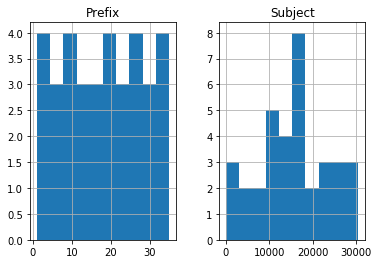

In [17]:
import pandas
%matplotlib inline
nm = pandas.read_table(cwd+"/"+inpD+"/Groups.txt")
nm.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f437a585860>,
      dtype=object)

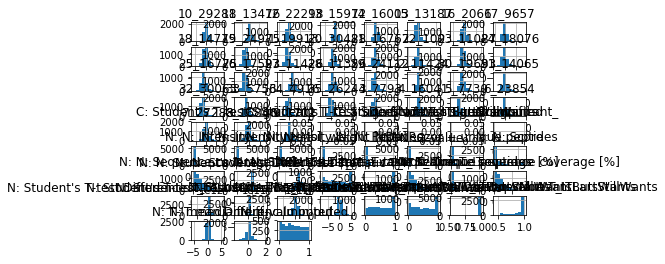

In [20]:
df = pandas.read_table(cwd+"/"+inpD+"/Copy of SuperSILACpTtestLars DoesNotWantButtStillWantsremoved.txt")
df.hist()

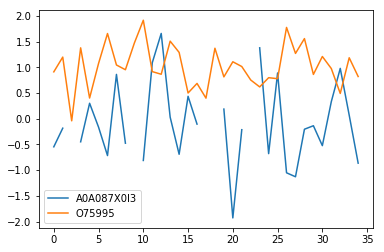

In [21]:
sb = pandas.read_table(cwd+"/"+inpD+"/HenrikList.txt")
#protn=['Q12965','D6R9P4','Q96K76','P62304','CON__Q28065','O00505']
protn=['A0A087X0I3','O75995']
prot=df[df['T: Uniprot'].isin(protn)].iloc[:,:35].transpose()
prot.columns=protn
prot.index.name = 'Name'
prot.reset_index(inplace=True)
protid=pandas.merge(prot,nm,on='Name',how='outer')
protid=pandas.merge(protid,sb,on='Subject',how='outer')
#protid.hist()
prot.plot()
#protid['Lymphoma']
protid.to_csv(cwd+"/"+inpD+"/LarsSelFtrDF.csv", header=True, index=False, sep=',', mode='a')
#protid
#transformasjon
#Lymphoma

In [23]:
sb[sb.Remove!="Y"].count()

B-nummer                           28
Transformert (T) og Ikke-T (IT)    28
transformasjon                     28
Subject                            28
Suff                               28
Remove                              0
dtype: int64

In [26]:
protid

,Name,A0A087X0I3,O75995,Lymphoma,Prefix,Subject,B-nummer,Transformert (T) og Ikke-T (IT),transformasjon,Suff,Remove
0,1_19913,-0.547055,0.910231,IT,1.0,19913,B19913/01,IT,16,1,NaN
1,10_29288,-0.184852,1.197100,IT,10.0,29288,B29288/02,IT,15,2,NaN
2,11_13476,NaN,-0.041523,IT,11.0,13476,B13476/88,IT,13,88,Y
3,12_22298,-0.449852,1.377140,IT,12.0,22298,B22298/01,IT,16,1,NaN
4,13_15972,0.299596,0.401482,T,13.0,15972,B15972/09,T,3,9,NaN
5,14_16003,-0.164915,1.073580,IT,14.0,16003,B16003/03,IT,14,3,NaN
6,15_13187,-0.717035,1.655220,IT,15.0,13187,B13187/03,IT,13,3,Y
7,16_2066,0.860792,1.043880,IT,16.0,2066,B2066/06,IT,11,6,NaN
8,17_9657,-0.477056,0.951596,IT,17.0,9657,B9657/01,IT,16,1,NaN
9,18_14775,NaN,1.470450,T,18.0,14775,B14775/01,T,4,1,NaN


KeyError: 'Lymphoma'

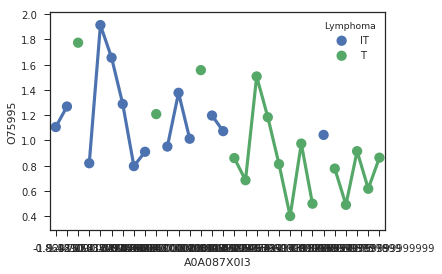

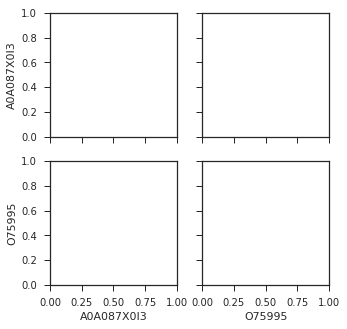

In [28]:
import seaborn as sb; sb.set(style="ticks", color_codes=True)
sb.pointplot('A0A087X0I3','O75995',hue='Lymphoma',data=protid)
protn=['A0A087X0I3','O75995']
gp = sb.pairplot(protid.fillna(0)[protn],hue="Lymphoma")
#protid = protid.drop('Subject', 1)
#protid = protid.drop('Suff', 1)
#protid = protid.drop('Prefix', 1)
#gp = sb.pairplot(protid.fillna(0),hue="Lymphoma")
#protid
#protid[protn]
#protid.fillna(0)

In [65]:
from bqplot import pyplot as plt
plt.plot(prot)
plt.show()


,Name,0
0,1_19913,-1.068670
1,10_29288,-1.090920
2,11_13476,-1.884320
3,12_22298,-1.706330
4,13_15972,0.034677
5,14_16003,-0.816231
6,15_13187,-2.201510
7,16_2066,-0.945907
8,17_9657,-1.022260
9,18_14775,-0.540920


In [ ]:
import keras
from keras.models import Sequential
model = Sequential()

In [6]:
from ipywidgets import IntSlider
IntSlider()

In [3]:
%load_ext rpy2.ipython


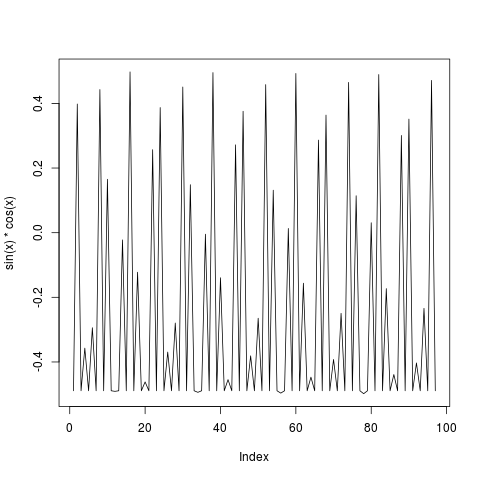

In [5]:
%%R
?plot
x=-2*pi:2*pi:100
plot(sin(x)*cos(x),type="l",color="blue")

In [ ]:
%%perl
open(F,"../../promec/Animesh/Lymphoma/LymphonaLog2LHsilacTrp.txt");
while(<F>){
    print join(",",split(/\t/,$_))
}


In [ ]:
%%bash
ls $HOME/promec/Animesh/Lymphoma

In [ ]:
from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))


In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)